# Filter method

In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from os import path

In [3]:
def read_image(image_path):
    intensity_image = cv2.imread(image_path) # cv2.IMREAD_GRAYSCALE
    return intensity_image.astype(np.float32) / 255

In [4]:
image_path = './image'
image1_filename = 'Ag 10nm 1000nm(Adaptive nonlinear color mapping limit range-10).jpg'
image2_filename = 'Ag 10nm 1000nm(Adaptive nonlinear color mapping limit range-20).jpg'
image3_filename = 'Ag 10nm 1000nm(Invert value Adaptive nonlinear color mapping limit range-10).jpg'

image1_file = path.join(image_path,image1_filename)
image2_file = path.join(image_path,image2_filename)
image3_file = path.join(image_path,image3_filename)

image1 = read_image(image1_file)
image2 = read_image(image2_file)
image3 = read_image(image3_file)


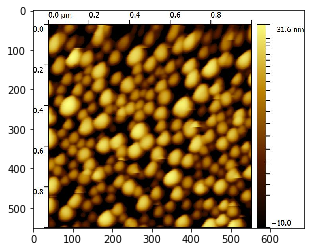

In [5]:
image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
plt.imshow(image1) # cmap = 'gray'
plt.show()

In [ ]:
def gaussian_kernel(sigma, kernel_half_size):
    '''
    Inputs:
        sigma = standard deviation for the gaussian kernel
        kernel_half_size = recommended to be at least 3*sigma
    
    Output:
        Returns a 2D Gaussian kernel matrix
    '''
    window_size = kernel_half_size*2+1
    gaussian_kernel_1d = signal.gaussian(window_size, std=sigma).reshape(window_size, 1)
    gaussian_kernel_2d = np.outer(gaussian_kernel_1d, gaussian_kernel_1d)
    gaussian_kernel_2d /= np.sum(gaussian_kernel_2d) # make sure it sums to one

    return gaussian_kernel_2d


In [6]:
def filter_image(im, fil):
    '''
    im: H x W floating point numpy ndarray representing image in grayscale
    fil: M x M floating point numpy ndarray representing 2D filter
    '''
    H, W = im.shape
    hs = fil.shape[0] // 2 # half of filter size
    fftsize = max(1024 , H+hs, W+hs)        # should be order of 2 (for speed) and include padding
    im_fft = np.fft.fft2(im, (fftsize, fftsize))   # 1) fft im with padding
    fil_fft = np.fft.fft2(fil, (fftsize, fftsize)) # 2) fft fil, pad to same size as image
    im_fil_fft = im_fft * fil_fft;                 # 3) multiply fft images
    im_fil = np.fft.ifft2(im_fil_fft)              # 4) inverse fft2
    im_fil = im_fil[hs:hs + H, hs:hs + W]          # 5) remove padding
    im_fil = np.real(im_fil)                       # 6) extract out real part
    return im_fil

In [ ]:
def filteredImage(img,fil,cutoff_low):
    Gaussian_filter2 = utils.gaussian_kernel(cutoff_high, cutoff_high*4)
    plt.figure()
    plt.imshow(Gaussian_filter2)
    plt.axis('off')
    plt.savefig('./image/FFT_HIGH')

    im1_lowpass = cv2.filter2D(im1,-1,Gaussian_filter1) #filter_image(im1,Gaussian_filter1)
    im2_highpass = im2 - cv2.filter2D(im2,-1,Gaussian_filter2) #filter_image(im2,Gaussian_filter2)
    
    plt.figure()
    plt.imshow(im1_lowpass, cmap='gray')
    plt.axis('off')
    plt.savefig('./image/dog_filter_low.jpg')
    
    plt.figure()
    plt.imshow(im2_highpass, cmap='gray')
    plt.axis('off')
    plt.savefig('./image/me_filter_high.jpg')
    result = (im1_lowpass + im2_highpass) / 2
    return result

# BlobDetector method

In [5]:
def blob_search_init():
    # Setup SimpleBlobDetector parameters.
    params = cv2.SimpleBlobDetector_Params()

    # Filter by Color 
    params.filterByColor = True

    # Filter by Area.
    params.filterByArea = False

    # Filter by Circularity
    params.filterByCircularity = True

    # Filter by Inerita
    params.filterByInertia = False

    # Filter by Convexity
    params.filterByConvexity = False

    # Any other params to set???
    params.blobColor = 255
    params.minCircularity = 0.5
    params.maxCircularity = 1

    blob_detector = cv2.SimpleBlobDetector_create(params)

    return blob_detector


In [6]:
def blob_search(image, detector):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower =(16,128,125)
    upper = (30,255,255)
    mask_image = cv2.inRange(hsv_image, lower, upper)
    blob_image_center = []
    
    detector =  blob_search_init()
    keypoints = detector.detect(crop_image)
#     for i in range(len(keypoints)):
#     blob_image_center.append(list(keypoints[i].pt))
    image = cv2.circle(image, (0,0), 3, (0, 0, 255), -1)
    
    return blob_image_center

In [15]:
hsv_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
# lower =(16,128,125)
# upper = (30,255,255)
lower = (0,0,0)
upper = (35,255,255)
mask_image1 = cv2.inRange(hsv_image1, lower, upper)
print(hsv_image1)

[[[239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  ...
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]]

 [[239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  ...
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]]

 [[239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  ...
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]]

 ...

 [[239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  ...
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]
  [239.          0.9999999   1.       ]]

 [

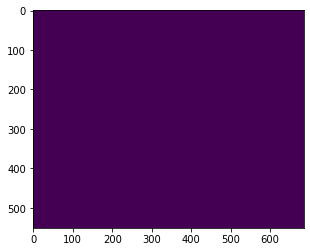

In [8]:
image1 = cv2.cvtColor(image1, cv2.COLOR_HSV2RGB)
plt.imshow(mask_image1)
plt.show()